# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: mohammad hossein moselmi
2.   Student Number: 97102463



*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.


import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test =train_test_split(dataset['X'].to_numpy(),dataset['Y'].to_numpy(),test_size=0.2,random_state=42)

x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x_train, y_train)

m = [reg.coef_[0][0],reg.intercept_[0]]
m

[-1.0191548119976181, 0.810468876931334]

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.sum((y_train-predicted_train_y)**2)/len(y_train)
test_error = np.sum((y_test.flatten() - predicted_test_y.flatten())**2)/len(y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")


MSE train error: 0.3307946156522651
MSE test error: 0.3297794594958148


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

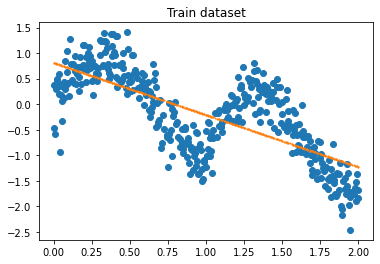

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

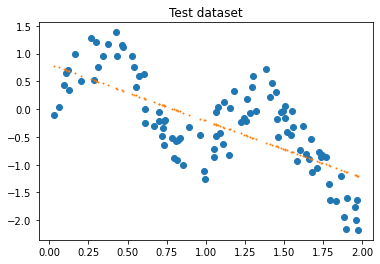

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

the acc is not acceptable and linear reg is not suitable for this dataset because of the form of the datas.

the test error is less, this may reflect biased sampling in the dataset that harder samples are mostly in training set. also, it is obvious that our model is underfitted and cannot make train ans test error less.  

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

In this dataset yes, because this method is best when our data is nonlinear. Also, this model allows more complexity for our model and if it does not overfit, it will perform better


### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        denominator = (-2 * hyperparameter * hyperparameter)
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/denominator)
        
    return W



Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.


In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([list(query_x)[0], 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * train_Y))

    return np.dot(qx, theta)



### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:

from sklearn.model_selection import KFold

res=[]
for hyperparameter in np.linspace(0.0001, 0.13, num=15):

    kf = KFold(n_splits=5,shuffle=True, random_state=42)
    prediction=[]
    true_label=[]
    for train_index, test_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        pred = [predict(x_train_fold, y_train_fold, query, hyperparameter) for query in x_val_fold]
        
        prediction+=list(np.array(pred).flatten())
        true_label+=list(y_val_fold.flatten())

    prediction=np.array(prediction)
    true_label=np.array(true_label)
    error=np.sum((true_label.flatten() - prediction)**2)/len(true_label)
    res.append([hyperparameter,error])


res.sort(reverse=False , key= lambda x:x[1])


hyperparameter=res[0][0]
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_train = [predict(x_train, y_train, query, hyperparameter) for query in x_train]

error = np.sum((y_test.flatten() - np.array(predicted_test).flatten())**2)/len(y_test)
error_test = np.sum((y_train.flatten() - np.array(predicted_train).flatten())**2)/len(y_train)

print('Best hyperparameter is:',hyperparameter)
print(f"MSE test error: {error}")
print(f"MSE train error: {error_test}")


Best hyperparameter is: 0.05577142857142858
MSE test error: 0.08881703499852522
MSE train error: 0.08521019146462755


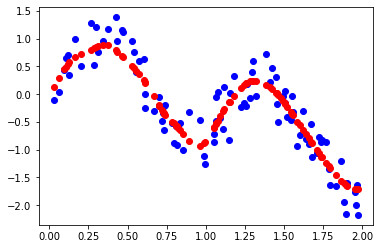

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="red")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

the performance is much beetter. after fine tunning hyperparameter using cross-validation we get best result. This model is for nonlinear datas and from the plot and train/test error we understand that our model is fitted correctly and it is neither underfitted not overfitted.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

this method will average near values for prediction. There is a very good chance if overfitting, but if the test data is similar to train data and if we choose K high enough it may perform well. K=1 is 

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.abs((x1-x2)).flatten()
        return distance

    def return_nn_ids(self, x):
        dis=np.abs(self.X-x).flatten()
        indices=np.argsort(dis)[0:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        # return neareest_indices
        predicted_y = np.average(self.Y[neareest_indices])
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.sum((y_test.flatten() - np.array(predicted_y).flatten())**2)/len(y_test)
    return error, predicted_y

In [13]:
from sklearn.model_selection import KFold

res=[]
for k in range(1,60):

    kf = KFold(n_splits=5,shuffle=True, random_state=42)
    prediction=[]
    true_label=[]
    for train_index, test_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        _,pred_y=evaluation(k,x_train_fold,y_train_fold,x_val_fold,y_val_fold)
        
        prediction+=pred_y
        true_label+=list(y_val_fold.flatten())

    prediction=np.array(prediction)
    true_label=np.array(true_label)
    error=np.sum((true_label.flatten() - prediction)**2)/len(true_label)
    # print('k=',k,'error:',error)
    res.append([k,error])




res.sort(reverse=False , key= lambda x:x[1])
K=res[0][0]

print('Best K is',K)

error_knn, predicted_y = evaluation(11, x_train, y_train, x_test, y_test)

print(f"\nMSE error of KNN for test dataset: {error_knn}")

Best K is 11

MSE error of KNN for test dataset: 0.09688855710541418


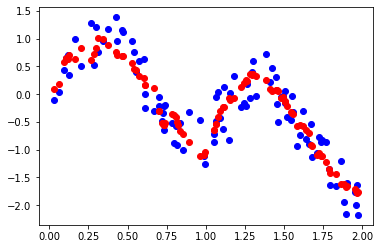

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="red")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

this model is perform well, but locally weighted model was sloghtly better, but also this model is neither underfited nor overfited